L'un des outils mathématiques les plus utilisé dans le monde de l'ingénieurie c'est la dérivé.A chaque fois qu'on à besoin de connaitre la variation d'une mesure, c'est l'outil  mathématique idéale. J'ai passé beaucoup de temps à faire des derivée sur Excel pour analyser des tendances ou reperer des changement de niveau de signaux analogique.

Avec la formule qui va bien dans Excel ça fonctionne nickel. Pourquoi s'embeter a faire autrement? Eh bien quand le dataset fait plus de un million de lignes, Excel va avoir beaucoup de mal à faire votre calcul et encore plus à vous afficher vos courbes. Je vous propose donc d'essayer de faire cela le plus simplement possible, le tout en une seule ligne de code. Si si c'est possible.

### L'objectif

Notre but sera de proceder à une dérivée numérique d'une fonction , pour cela on va utilisé le dataset que l'on à crée precedemment. Ensuite on va calculer cette fameuse dérivée juste avec une ligne de code et peu importe la taille du dataset !!

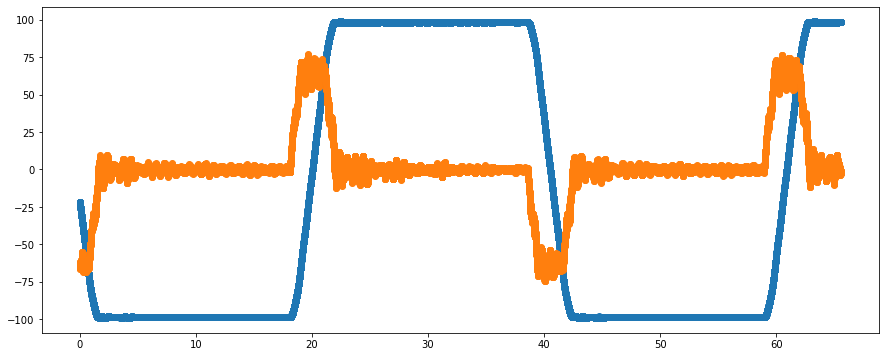

In [ ]:
# %cd data

import pandas as pd
import matplotlib.pyplot as plt

# chargement des données
df = pd.read_csv('Laser-measure.csv', skiprows=4, names=['y']).reset_index()
df = df.rename(columns={"index":"x"})
df['x'] = df['x'] / 1000


# Calcul de la dérivé numérique
df['fprime'] = df['y'].diff(periods=-1) / df['x'].diff(periods=-1)

# calcul de la derivée numérique avec moyenne glissante
df['fprimeMovAv'] = df['y'].diff(periods=-1).rolling(20).mean() / df['x'].diff(periods=-1).rolling(20).mean()

plt.figure(figsize=(15, 6))
plt.scatter(data=df, y='y', x='x')
# plt.scatter(data=df, y='fprime', x='x')
plt.scatter(data=df, y='fprimeMovAv', x='x')

Pour realisé la dérivée numérique on à utilisé la méthode diff de pandas. Cette méthode est vraiment pratique dans notre cas. Par contre on remarque que elle est vraiment trés bruité. Cela est principalement causé par des faible variations de notre variable y. Rien de bien grave on peut simplement faire une moyenne glissante pour "lissé" la courbe derivée. Et voila !!

La dérivée qu'on à realisé est en fait discrete, c'est à dire qu'on realise le calcul pour chaque point. Si c'etait une fonction continue comme x² alors on connait déja sa derivé qui est x/2. Ce n'est pas notre but ici. Lorsque qu'on récupère des données issue de mesure, ce ne sont jamais des fonction mathématique parfaite.

Ok c'est top mais maintenant est-ce que je peux faire comme la fois dernière c'est à dire enregistrer mes données pour les utiliser avec Excel ? La réponse est OUI. On va meme faire mieux cette fois ci, plutot que de l'enregistrer au format csv, on va directement l'engistrer au format xlsx grace à pandas.
Pour cela rien de plus simple il suffit d'executer la commande suivante : 

In [ ]:
df.to_excel('DonneeCalcule.xlsx')

Super non ? Bon il nous reste le problème des graphiques ... Excel n'arrivera pas à vous afficher autant de données sans essayer peniblement de mettre à jour l'affichage pour tous les points. Alors on va commencer à utiliser les librairies de visualisation. La plus connue c'est matplotlib. Vous trouverez plein d'exemple sur leur site internet je vous conseille d'y faire un tour. Mais tout d'abord, on va simplement à notre serpent preferer de nous afficher les graphiques comme ceci :

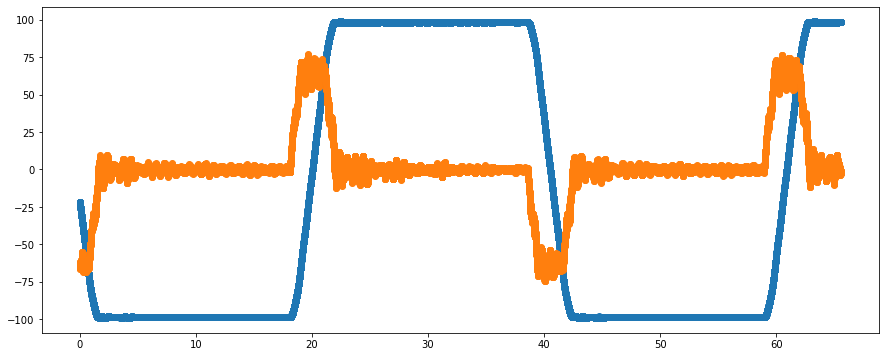

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data=df, y='y', x='x')
# plt.scatter(data=df, y='fprime', x='x')
plt.scatter(data=df, y='fprimeMovAv', x='x')
plt.savefig('graphique.png')

### code à emporter

C'est top non ? on à le fichier excel et le graphiqe en données de sortie. Maintenant pourquoi pas ajouter cela à notre petit script d'origine ? Ca donne quoi ?

```python
# Etape 0 : importer nos bibliotheques d'outils 
import pandas as pd
import os
import glob 

# Etape 1 : recuperer le chemin d'accés du repertoire ou l'on se trouve
datasPath = os.getcwd()
os.chdir(datasPath)

# Etape 2 : Rechercher ET lister tous les fichiers texte dans le repertoire ou l'on se trouve
fichierRestulat = glob.glob(datasPath + "\*.txt", recursive = True)

# Etape 3 : crée une matrice de donnée vide
df_mesures = pd.DataFrame()

# Etape 4 : Ouvrir chaque fichier et l'ajouter dans la matrice de données
# Etape 5 : Ajouter le nom du fichier (c'est plus pratique pour connaitre la source des données)
for file in fichierRestulat:
    df = pd.read_csv(file)
    df['Fichier'] = str(file)
    df = df.reset_index()
    df_mesures = df.append(df_mesures, ignore_index=True)
    
# Etape 6 : Exporter notre matrice de donnée rempli au format csv
df_mesures.to_csv('DonneeFusion.csv')

# Etape 7 : calcul de la derivée numérique avec moyenne glissante
df['fprimeMovAv'] = df['y'].diff(periods=-1).rolling(20).mean() / df['x'].diff(periods=-1).rolling(20).mean()

# Etape 8 : Exporter les données au format Excel
df.to_excel('DonneeCalcule.xlsx')

# Etape 9 : Enregistrer un graphique au format png
plt.figure(figsize=(15, 6))                    # On definit la taille de notre zone graphique
plt.scatter(data=df, y='y', x='x')             #
plt.scatter(data=df, y='fprimeMovAv', x='x')
plt.savefig('graphique.png')

```

Encore une fois, on à vu beaucoup de chose aujourd'hui ! Tout d'abord comment faire une dérivé numérique et une moyenne glissante avec les méthodes native de pandas : diff, rolling et mean. Et enfin enregistrer notre graphique au format png. Notre script continue de grandir et automatise toutes les opérations sans quittez pour autant votre Excel preferer. mais avec le temps vous verrez Excel ne vous servira que pour communiquer avec les équipes, Python et Anaconda seront trés prochainement vos meilleurs amis.

### Pour aller plus loin :
le principe de la derivée sur wikipedia
le principe de la moyenne glissante sur Wikipedia
Le site matplotlib si vous souhaitez modifier le visuel de vos graphique
